# Pytorch Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()

In [4]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,1,1,1,0.012658
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,1,1,1,0.032500
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,0,1,0,0.012106
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,0,0,0,0.000000
2014-01-09,4.20,4.23,4.05,4.09,4.09,30667600,0,0,1,-0.021531


In [5]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
2018-08-20,19.790001,20.08,19.350000,19.980000,19.980000,62983200,0,1,1,0.010622
2018-08-21,19.980000,20.42,19.860001,20.400000,20.400000,55629000,1,1,1,0.021021
2018-08-22,20.280001,20.92,20.209999,20.900000,20.900000,62002700,1,1,1,0.024510
2018-08-23,21.190001,22.32,21.139999,22.290001,22.290001,113444100,1,1,1,0.066507
2018-08-24,22.910000,24.00,22.670000,23.980000,23.980000,164328200,0,0,0,0.075819


In [6]:
dataset.shape

(1170, 10)

In [7]:
import torch
import torch.nn as nn

X = torch.Tensor(dataset[['Open']].values)
y = torch.Tensor(dataset[['Adj Close']].values)

In [8]:
x_train = np.array(X, dtype=np.float32)
x_train.shape

(1170, 1)

In [9]:
y_train = np.array(y, dtype=np.float32)
y_train.shape

(1170, 1)

In [10]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  

    def forward(self, x):
        out = self.linear(x)
        return out

In [11]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [12]:
criterion = nn.MSELoss()

In [13]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [14]:
epochs = 100

In [15]:
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 

    # Forward to get output
    outputs = model(inputs)

    # Calculate Loss
    loss = criterion(outputs, labels)

    # Getting gradients w.r.t. parameters
    loss.backward()

    # Updating parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 0.5020267367362976
epoch 2, loss 0.25242939591407776
epoch 3, loss 0.19715286791324615
epoch 4, loss 0.1839243620634079
epoch 5, loss 0.17980721592903137
epoch 6, loss 0.17767709493637085
epoch 7, loss 0.17599248886108398
epoch 8, loss 0.1744200885295868
epoch 9, loss 0.1728873997926712
epoch 10, loss 0.1713785082101822
epoch 11, loss 0.16988997161388397
epoch 12, loss 0.1684207171201706
epoch 13, loss 0.1669703722000122
epoch 14, loss 0.16553857922554016
epoch 15, loss 0.16412518918514252
epoch 16, loss 0.1627298891544342
epoch 17, loss 0.1613524705171585
epoch 18, loss 0.1599927842617035
epoch 19, loss 0.1586504876613617
epoch 20, loss 0.15732528269290924
epoch 21, loss 0.1560172289609909
epoch 22, loss 0.1547258198261261
epoch 23, loss 0.1534510999917984
epoch 24, loss 0.15219268202781677
epoch 25, loss 0.1509503722190857
epoch 26, loss 0.14972400665283203
epoch 27, loss 0.1485133171081543
epoch 28, loss 0.14731822907924652
epoch 29, loss 0.14613832533359528
epoch 30, 

In [16]:
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

array([[ 3.7770548],
       [ 3.8080235],
       [ 3.993832 ],
       ...,
       [20.60309  ],
       [21.542458 ],
       [23.317965 ]], dtype=float32)

In [17]:
y_train

array([[ 4.  ],
       [ 4.13],
       [ 4.18],
       ...,
       [20.9 ],
       [22.29],
       [23.98]], dtype=float32)

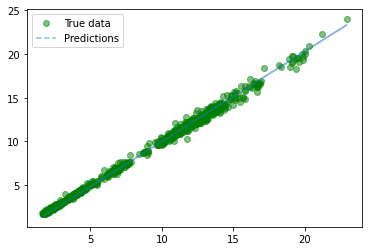

In [18]:
plt.clf()

# Get predictions
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

In [19]:
y_pred = model(torch.tensor([[22.290001]], dtype=torch.float32)).detach()
y_pred.item()

22.67795753479004